In [51]:
import numpy as np
import pandas as pd
import warnings
import matplotlib as mlt
import matplotlib.pyplot as plt
from importlib import reload
warnings.filterwarnings('ignore')

In [70]:
data = pd.read_excel('DS1_C4_S5_Car_Data_Challenge.xlsx')
data

,isker,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [71]:
# task 1 Manufacturer wise Max city mileage and it's bar graph

t1 = pd.pivot_table(data, index=['Make'], values=['City_Mileage_km_litre'], aggfunc=['max'])
t1

,max
,City_Mileage_km_litre
Make,
Aston Martin,9.10
Audi,19.20
Bentley,9.60
Bmw,18.00
Datsun,21.38
Dc,8.00
Ferrari,6.00
Fiat,21.20


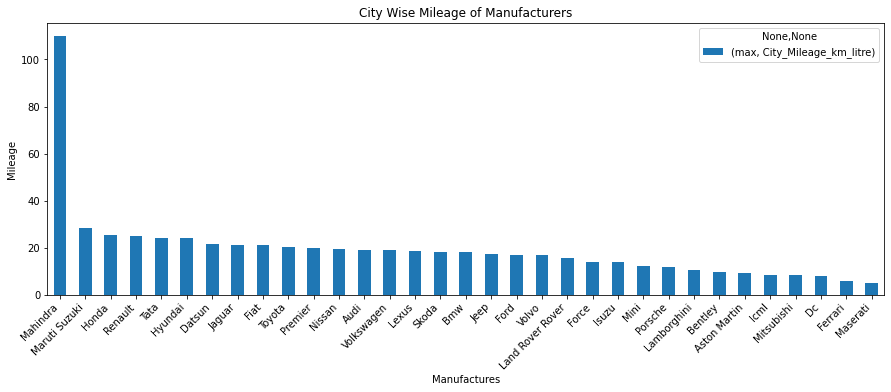

In [72]:
# task 1 part 2

t1a = t1.reindex(t1['max'].sort_values(by = 'City_Mileage_km_litre', ascending = False).index)
t1a.plot.bar(title = 'City Wise Mileage of Manufacturers', xlabel = 'Manufactures', ylabel = 'Mileage', figsize = (15, 5))
plt.xticks(rotation=45, ha='right');

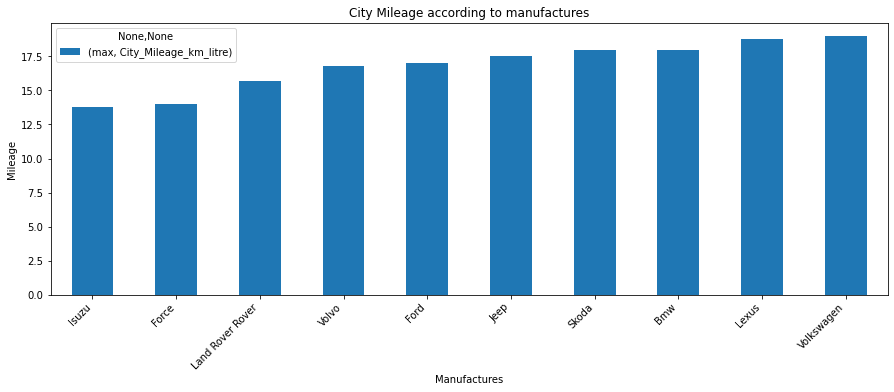

In [73]:
# task 2 Next top 10 makers with highest mileage

t2 = pd.pivot_table(data, index = ['Make'], values = ['City_Mileage_km_litre'], aggfunc = ['max'])
t2b = t2.reindex(t2['max'].sort_values(by = 'City_Mileage_km_litre').index)
t2c = t2b.iloc[10:20,0:]
t2c.plot.bar(title = 'City Mileage according to manufactures', xlabel = 'Manufactures', ylabel = 'Mileage', figsize = (15, 5))
plt.xticks(rotation=45, ha='right');

In [74]:
# task 3 part 1 Count of cars by body type and it's pie chart representing the market share

t3 = data.groupby(by='Body_Type')[['Body_Type']].count()
t3.columns=['Body Type']
t3b = t3.sort_values(by='Body Type',ascending=False).head(10)
t3b

,Body Type
Body_Type,
SUV,447
Sedan,333
Hatchback,316
Coupe,41
MPV,39
MUV,39
Convertible,20
Crossover,18
Sports,3


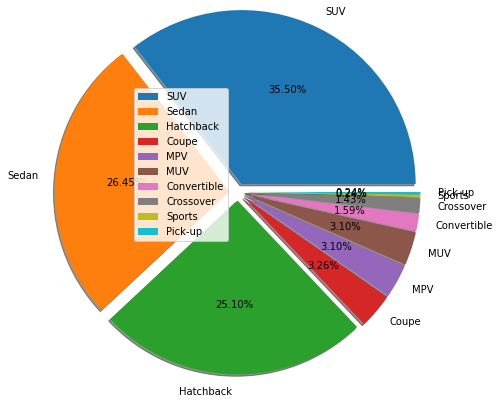

In [75]:
# task 3 part 2

plt.pie(t3b['Body Type'],labels=t3b.index, autopct='%.2f%%',shadow=True, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], radius = 2)
plt.legend();

In [76]:
# task 4 part 1 Comparing mileage of cars from hyundai, mahindra, renault and skoda using bar graph

data['Highway_Mileage_km_litre']=data['Highway_Mileage_km_litre'].fillna(data['Highway_Mileage_km_litre'].mean())
data['Highway_Mileage_km_litre'].isnull().sum()

0

In [77]:
t4=data[((data.Make=='Hyundai')|(data.Make=='Mahindra')|(data.Make=='Renault')|(data.Make=='Skoda'))][['Make','City_Mileage_km_litre','Highway_Mileage_km_litre']]
t4mean = pd.pivot_table(t4,index=['Make'],values=['City_Mileage_km_litre','Highway_Mileage_km_litre'],aggfunc=['mean'])
t4med=pd.pivot_table(t4,index=['Make'],values=['City_Mileage_km_litre','Highway_Mileage_km_litre'],aggfunc=['median'])
t4b = pd.concat([t4mean, t4med], axis=1)
t4b

mean                                         median  \
         City_Mileage_km_litre Highway_Mileage_km_litre City_Mileage_km_litre   
Make                                                                            
Hyundai              16.679853                17.325799                 16.38   
Mahindra             20.003763                17.483460                 16.00   
Renault              20.554286                17.082279                 21.04   
Skoda                13.953333                17.187148                 14.50   

                                   
         Highway_Mileage_km_litre  
Make                               
Hyundai                 16.879706  
Mahindra                16.879706  
Renault                 16.879706  
Skoda                   16.879706

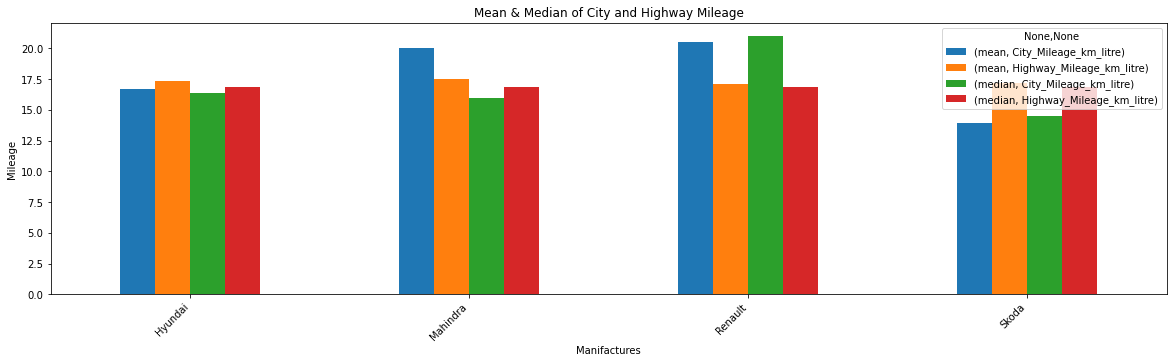

In [78]:
# task 4 part 2

t4b.plot.bar(xlabel = 'Manifactures', ylabel = 'Mileage', title = 'Mean & Median of City and Highway Mileage', figsize = (20, 5));
plt.xticks(rotation=45, ha='right');

In [79]:
# task 5 part 1 Comparing mileage of cars from hyundai, mahindra, Volkswagen and Toyota using bar graph

t5=data[((data.Make=='Hyundai')|(data.Make=='Mahindra')|(data.Make=='Volkswagen')|(data.Make=='Toyota'))][['Make','City_Mileage_km_litre','Highway_Mileage_km_litre']]
t5mean = pd.pivot_table(t5,index=['Make'],values=['City_Mileage_km_litre','Highway_Mileage_km_litre'],aggfunc=['mean'])
t5med=pd.pivot_table(t5,index=['Make'],values=['City_Mileage_km_litre','Highway_Mileage_km_litre'],aggfunc=['median'])
t5b = pd.concat([t5mean, t5med], axis=1)
t5b

mean                           \
           City_Mileage_km_litre Highway_Mileage_km_litre   
Make                                                        
Hyundai                16.679853                17.325799   
Mahindra               20.003763                17.483460   
Toyota                 14.293065                17.645093   
Volkswagen             16.225000                17.916306   

                          median                           
           City_Mileage_km_litre Highway_Mileage_km_litre  
Make                                                       
Hyundai                    16.38                16.879706  
Mahindra                   16.00                16.879706  
Toyota                     13.60                16.879706  
Volkswagen                 15.30                16.879706

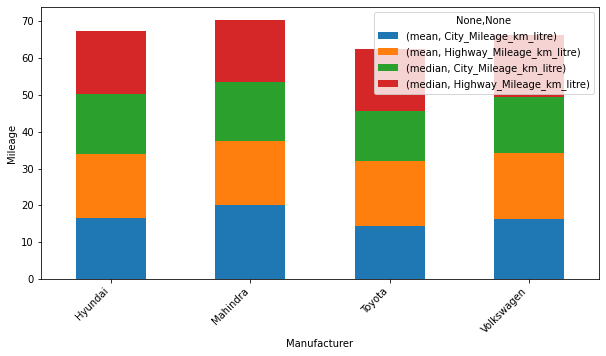

In [80]:
# task 5 part 2

t5b.plot.bar(stacked=True, ylabel = 'Mileage', xlabel = 'Manufacturer', figsize = (10, 5));
plt.xticks(rotation=45, ha='right');

In [81]:
# task 6 Comparing fuel economy of different cars with bar graph

data['City_Mileage_km_litre']=data['City_Mileage_km_litre'].fillna(data['City_Mileage_km_litre'].mean())
t6 = pd.pivot_table(data,index=['Make'],values=['City_Mileage_km_litre','Highway_Mileage_km_litre'],aggfunc=['mean'])
t6mean = t6.reindex(t6['mean'].sort_values(by='City_Mileage_km_litre',ascending=False).index)
t6mean

mean                         
                 City_Mileage_km_litre Highway_Mileage_km_litre
Make                                                           
Renault                      19.501196                17.082279
Mahindra                     19.088655                17.483460
Maruti Suzuki                19.055414                17.999524
Datsun                       18.894153                18.778451
Tata                         17.456098                18.365026
Lexus                        16.749229                16.879706
Honda                        16.356970                17.601356
Hyundai                      16.267567                17.325799
Fiat                         16.078930                17.611151
Volkswagen                   16.008143                17.916306
Kia                          15.815381                16.879706
Maruti Suzuki R              15.815381                16.879706
Land Rover                   15.815381                16.879706
Bugatti                      15.815381                16.879706
Bajaj                        15.815381                16.879706
Mg                           15.815381                16.879706
Jeep                         15.552470                16.576859
Nissan                       15.544481                17.360811
Ford                         15.215918                16.452524
Mini                         14.912305                16.571735
Bmw                          14.894946                16.484412
Toyota                       14.664361                17.645093
Force                        14.605127                16.959902
Skoda                        14.516278                17.187148
Audi                         13.888088                15.990740
Volvo                        13.748162                17.129788
Premier                      13.666667                17.283333
Land Rover Rover             13.349685                15.326460
Jaguar                       12.368145                15.884826
Porsche                      12.107691                12.475567
Isuzu                         9.900000                11.700000
Ferrari                       8.630768                10.642390
Icml                          8.600000                11.120000
Maserati                      8.538460                 9.604346
Mitsubishi                    8.080769                11.562815
Dc                            8.000000                10.000000
Bentley                       6.819230                 9.346618
Aston Martin                  6.700000                12.593235
Lamborghini                   6.293491                14.430543

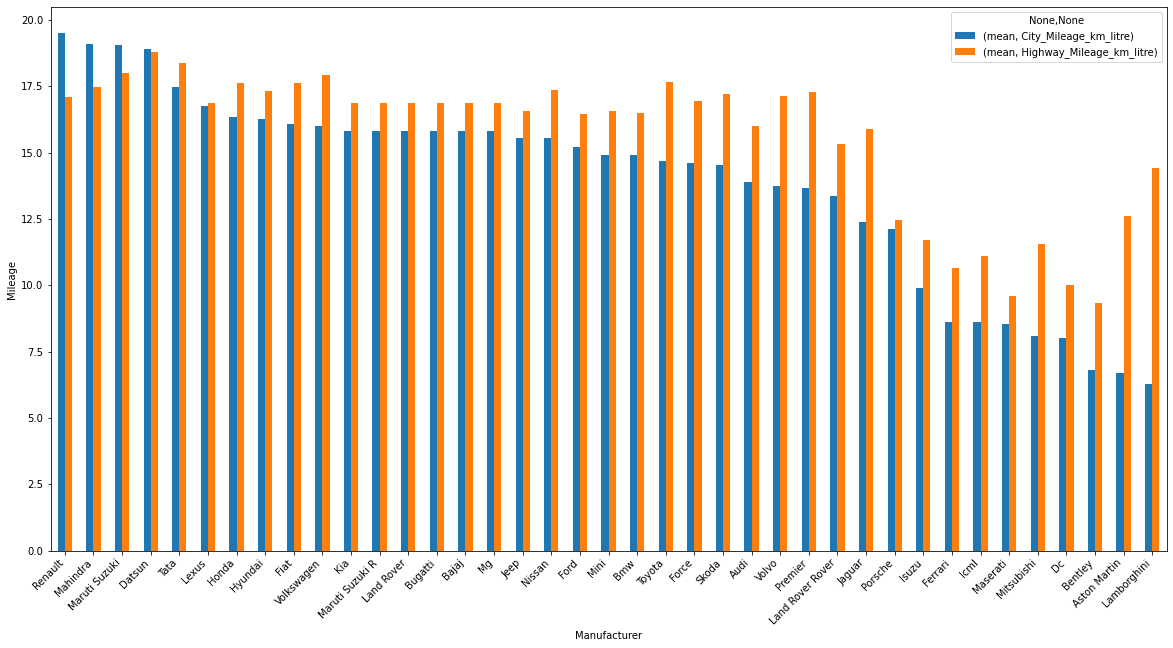

In [82]:
# task 6 part 2

t6mean.plot.bar(figsize = (20, 10), xlabel = 'Manufacturer', ylabel = 'Mileage')
plt.xticks(rotation=45, ha='right');

In [83]:
# task 7 Scatterplot for the fuel tank capacity and displacement

data['Displacement'] = data['Displacement'].fillna(data['Displacement'].mean())
data['Fuel_Tank_Capacity_litre'] = data['Fuel_Tank_Capacity_litre'].fillna(data['Fuel_Tank_Capacity_litre'].mean())
t7 = data.groupby(by = ['Make'])[['Displacement','Fuel_Tank_Capacity_litre']].mean().sort_values('Fuel_Tank_Capacity_litre',ascending=False).head(10)
t7

,Displacement,Fuel_Tank_Capacity_litre
Make,,
Bentley,5447.833333,88.333333
Ferrari,4589.500000,86.750000
Lamborghini,5409.692308,85.932248
Land Rover,2795.000000,83.600000
Aston Martin,5038.333333,81.166667
Maserati,3363.888889,75.666667
Porsche,3062.928571,74.357143
Lexus,3491.600000,74.311922
Land Rover Rover,3199.703704,71.761107


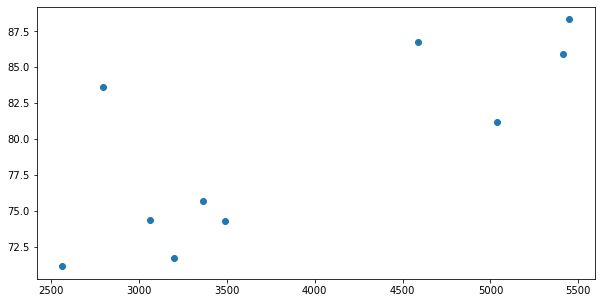

In [84]:
# task 7 part 2

plt.figure(figsize=(10, 5))
plt.scatter(t7['Displacement'], t7['Fuel_Tank_Capacity_litre']); #, figsize = (10, 5)) *x/y labels not working*

In [85]:
# task 8 fuel tank capacity and average mileage

data.insert(20, 'Average_Mileage', np.nan)
Average_Mileage = (data.City_Mileage_km_litre + data.Highway_Mileage_km_litre)/ 2
data['Average_Mileage'] = Average_Mileage
t8 = pd.pivot_table(data, index = ['Average_Mileage'], values = ['Fuel_Tank_Capacity_litre'], aggfunc=['mean'])
t8b = t8.reindex(t8['mean'].sort_values(by='Fuel_Tank_Capacity_litre',ascending=False).index)
t8b

,mean
,Fuel_Tank_Capacity_litre
Average_Mileage,
7.000000,105.0
8.700000,105.0
4.380000,100.0
12.550000,100.0
14.839853,93.5
...,...
20.890000,32.0
15.989853,32.0


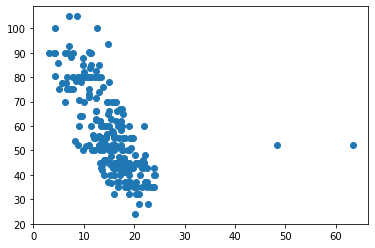

In [86]:
# task 8 part 2

plt.scatter(t8b.index, t8b.values)

In [18]:
# task 9 Bar garph for manufacturers of safe cars and their mileage

data['Central_Locking'] = data['Central_Locking'].fillna('Yes')
data['Child_Safety_Locks'] = data['Child_Safety_Locks'].fillna('Yes')
data['Hill_Assist'] = data['Hill_Assist'].fillna('No')        
data['High_Speed_Alert_System'] = data['High_Speed_Alert_System'].fillna('No')   
data['Passenger_Side_Seat-Belt_Reminder'] = data['Passenger_Side_Seat-Belt_Reminder'].fillna('No')
t9 = data[((data.Central_Locking=='Yes')&(data.Child_Safety_Locks=='Yes')&(data.Hill_Assist=='Yes')&(data.High_Speed_Alert_System=='Yes')&(data['Passenger_Side_Seat-Belt_Reminder']=='Yes'))][['Make','Average_Mileage']]
t9b = t9.sort_values(by='Average_Mileage',ascending=False).head(10)
t9b

,Make,Average_Mileage
313,Lexus,17.839853
271,Volvo,16.347544
1033,NaN,16.347544
1031,Mini,16.347544
1030,Mini,16.347544
1029,Mini,16.347544
973,Kia,16.347544
842,Porsche,16.347544
811,NaN,16.347544
792,Land Rover Rover,16.347544


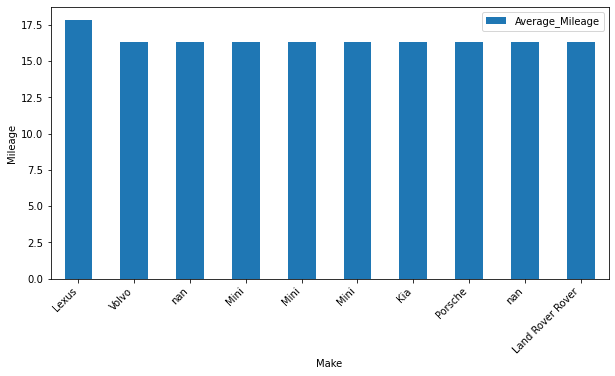

In [19]:
# task 9 part 2

t9b.plot.bar(x = 'Make', ylabel = 'Mileage', figsize = (10, 5))
plt.xticks(rotation=45, ha='right');

In [20]:
# task 10 Cars with Normal, Comfort, Eco, Sport, Power driving modes

data['Drive_Modes'] = data['Drive_Modes'].fillna('Normal')
t10 = data[(data.Drive_Modes == 'Normal, Comfort, Eco, Sport, Power Mode')]
t10

,isker,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
321,321,Audi,Q8,55 Tfsi Quattro Tiptronic,2995.0,4.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,"Roller cam follower, continuous intake and exh...",Yes,Yes,NaN,Yes,Yes,NaN,NaN
330,330,Audi,A8 L,55 Tfsi Quattro,2995.0,8.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN


In [87]:
# task 11 Histograms representing spread of fuel economy for Hyundai, Suzuki, TATA and BMW

t11a=data[data.Make=='Hyundai'][['Make','Model','Average_Mileage']]
t11a

,Make,Model,Average_Mileage
46,Hyundai,Santro,16.347544
47,Hyundai,Santro,16.347544
48,Hyundai,Santro,16.347544
49,Hyundai,Santro,16.347544
50,Hyundai,Santro,16.347544
...,...,...,...
1132,Hyundai,Creta,19.129853
1133,Hyundai,Creta,16.084853
1134,Hyundai,Creta,16.084853
1135,Hyundai,Creta,16.347544


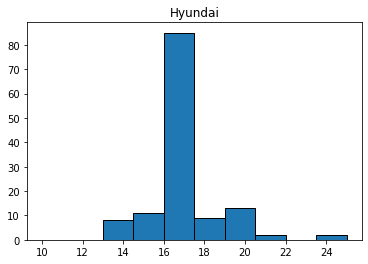

In [88]:
# task 11 part 2

plt=reload(plt)
plt.hist(t11a.Average_Mileage, range = [10, 25], edgecolor = 'black')
plt.title('Hyundai'); # giving error

In [89]:
# task 11 part 3

t11b = data[data.Make=='Maruti Suzuki'][['Make','Model','Average_Mileage']]
t11b

,Make,Model,Average_Mileage
24,Maruti Suzuki,Eeco,13.500000
25,Maruti Suzuki,Eeco,13.500000
26,Maruti Suzuki,Eeco,13.000000
27,Maruti Suzuki,Eeco,16.347544
28,Maruti Suzuki,Eeco,16.347544
...,...,...,...
1098,Maruti Suzuki,Ciaz,16.347544
1099,Maruti Suzuki,Ciaz,16.347544
1100,Maruti Suzuki,Ciaz,21.849853
1101,Maruti Suzuki,Ciaz,21.599853


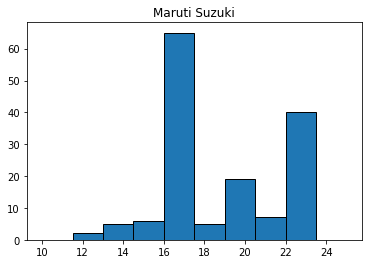

In [90]:
# task 11 part 4 

plt=reload(plt)
plt.hist(t11b.Average_Mileage, range = [10, 25], edgecolor = 'black')
plt.title('Maruti Suzuki'); # giving error

In [91]:
# task 11 part 5

t11c = data[data.Make=='Tata'][['Make','Model','Average_Mileage']]
t11c

,Make,Model,Average_Mileage
0,Tata,Nano Genx,20.239853
1,Tata,Nano Genx,20.239853
2,Tata,Nano Genx,16.347544
3,Tata,Nano Genx,20.239853
4,Tata,Nano Genx,20.239853
...,...,...,...
1141,Tata,Harrier,16.347544
1187,Tata,Tiago Nrg,16.347544
1188,Tata,Tiago Nrg,16.347544
1189,Tata,Tiago Nrg,16.347544


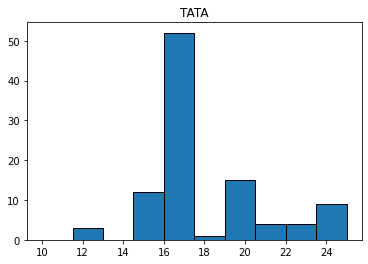

In [92]:
# task 11 part 6

plt=reload(plt)
plt.hist(t11c.Average_Mileage, range = [10, 25], edgecolor = 'black')
plt.title('TATA'); # giving error

In [93]:
# task 11 part 7

t11d = data[data.Make=='Bmw'][['Make','Model','Average_Mileage']]
t11d

,Make,Model,Average_Mileage
288,Bmw,X3,17.280000
289,Bmw,X3,17.280000
290,Bmw,X3,17.280000
295,Bmw,X5,16.347544
296,Bmw,X5,16.347544
297,Bmw,X5,16.347544
304,Bmw,M2 Competition,10.400000
315,Bmw,7-Series,14.980000
316,Bmw,7-Series,14.980000
317,Bmw,7-Series,14.980000


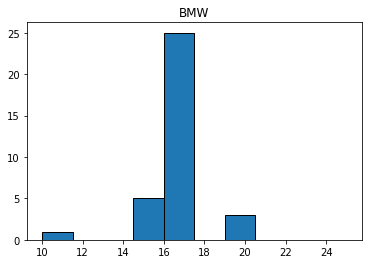

In [94]:
# task 11 part 7

plt=reload(plt)
plt.hist(t11d.Average_Mileage, range = [10, 25], edgecolor = 'black')
plt.title('BMW');